In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns
import src.bayesian_stats as bst

print(f"Running on PyMC3 v{pm.__version__}")

Running on PyMC3 v3.11.2


In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.95
rng = np.random.default_rng(seed=42)


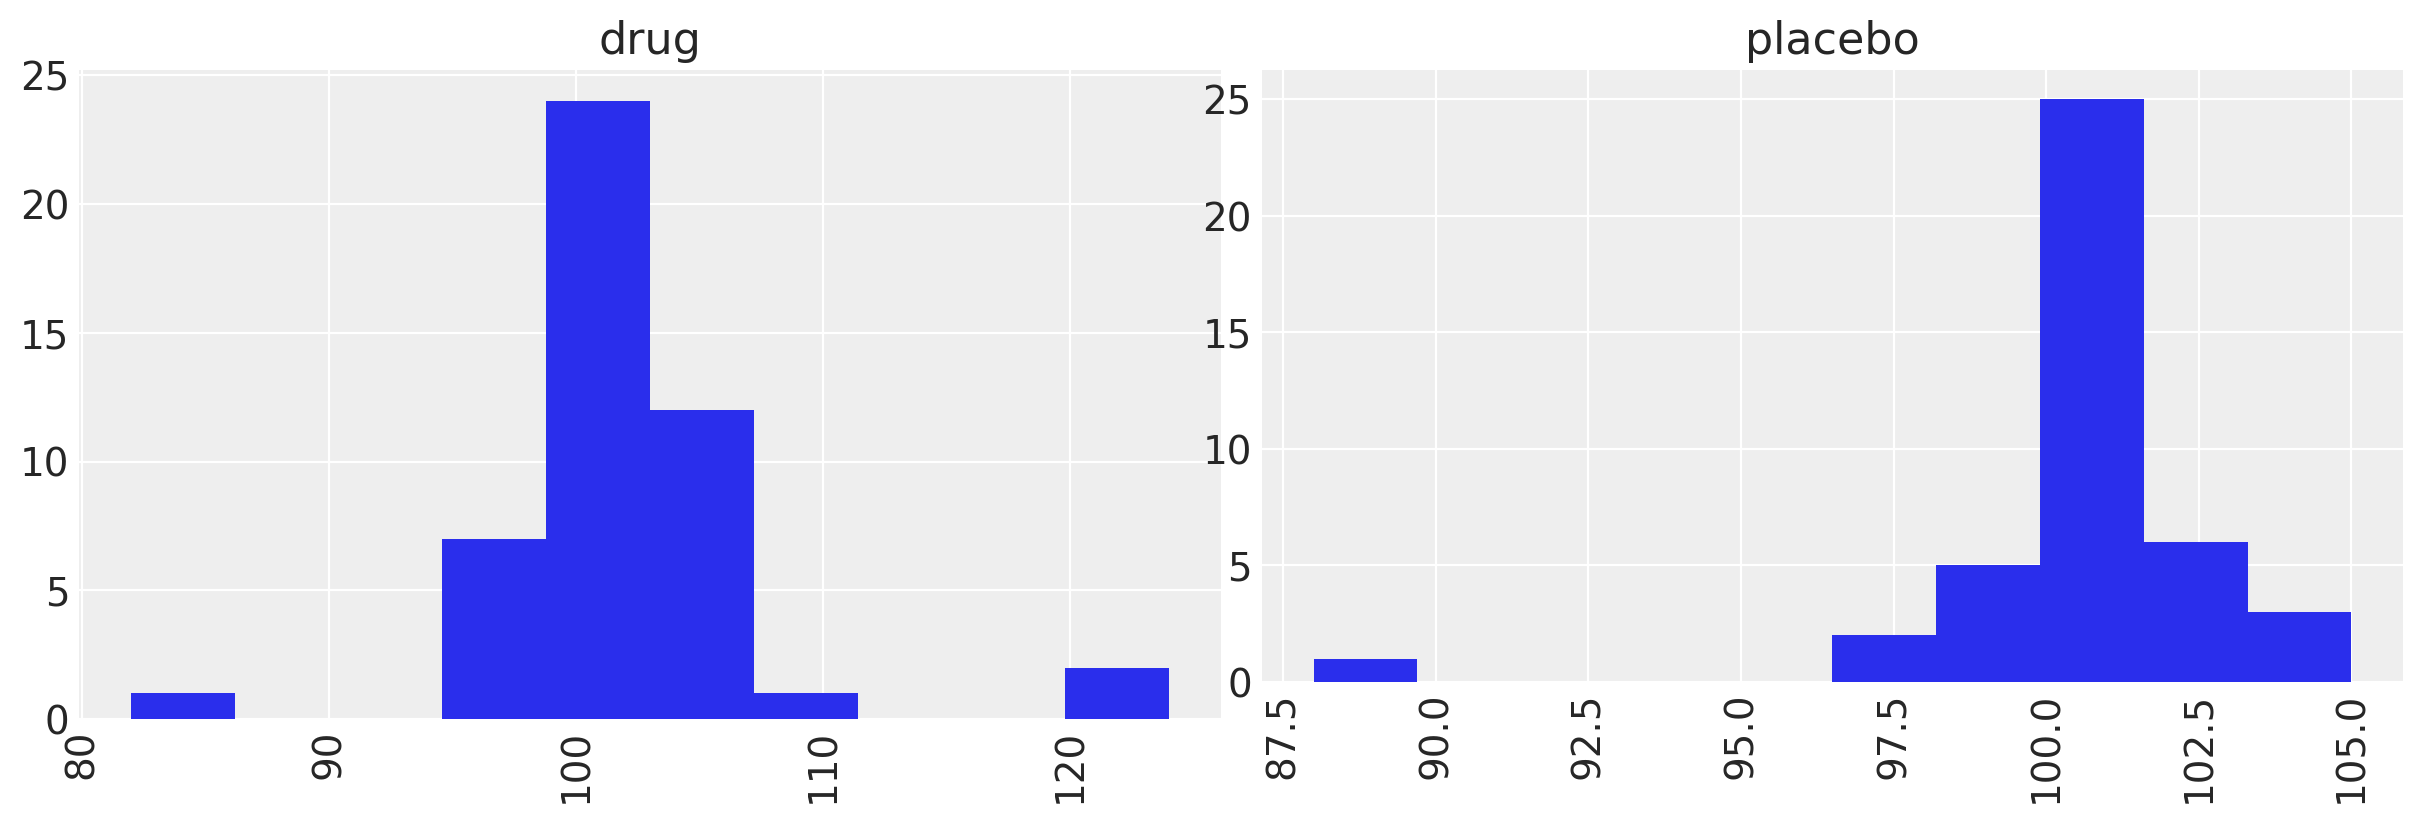

In [3]:
# Using data from pymc3 port of Kruschke's BEST model (see: 
# https://www.pymc.io/projects/examples/en/latest/case_studies/BEST.html)
drug = (101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101)
placebo = (99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99)

y1 = np.array(drug)
y2 = np.array(placebo)
y = pd.DataFrame(
    dict(value=np.r_[y1, y2], group=np.r_[["drug"] * len(drug), ["placebo"] * len(placebo)])
)

y.hist("value", by="group", figsize=(12, 4));

In [4]:
# Call your Bayesian function from the toolbox
model, idata = bst.compare_two_groups(y["value"], y["group"], 0.1, 10, 2000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu_minus_one, group2_std, group1_std, group2_mean, group1_mean]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 23 seconds.


In [5]:
# Print out a summary of results
az.summary(idata)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
group1_mean,101.553,0.386,100.784,102.316,0.005,0.004,5266.0,4556.0,1.0
group2_mean,100.528,0.215,100.100,100.943,0.003,0.002,6058.0,5040.0,1.0
group1_std,2.057,0.434,1.289,2.954,0.006,0.004,5085.0,5560.0,1.0
group2_std,1.053,0.207,0.681,1.482,0.003,0.002,6272.0,5661.0,1.0
nu_minus_one,0.837,0.472,0.010,1.713,0.007,0.005,4451.0,3771.0,1.0
nu,1.837,0.472,1.010,2.713,0.007,0.005,4451.0,3771.0,1.0
difference of means,1.025,0.441,0.149,1.908,0.006,0.004,5199.0,4830.0,1.0
difference of stds,1.004,0.437,0.182,1.879,0.006,0.004,6021.0,5186.0,1.0
effect size,0.647,0.299,0.041,1.230,0.004,0.003,5423.0,4755.0,1.0


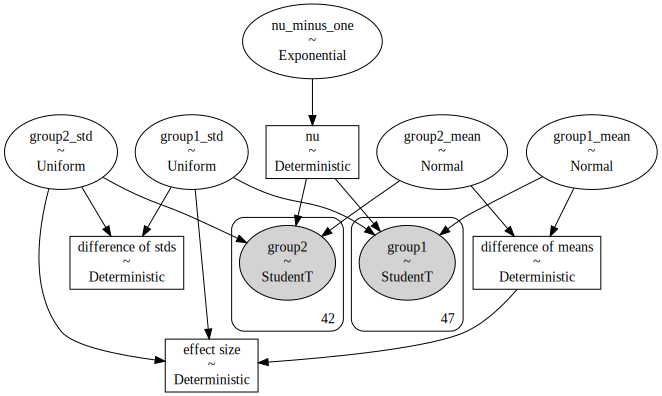

In [6]:
pm.model_to_graphviz(model)

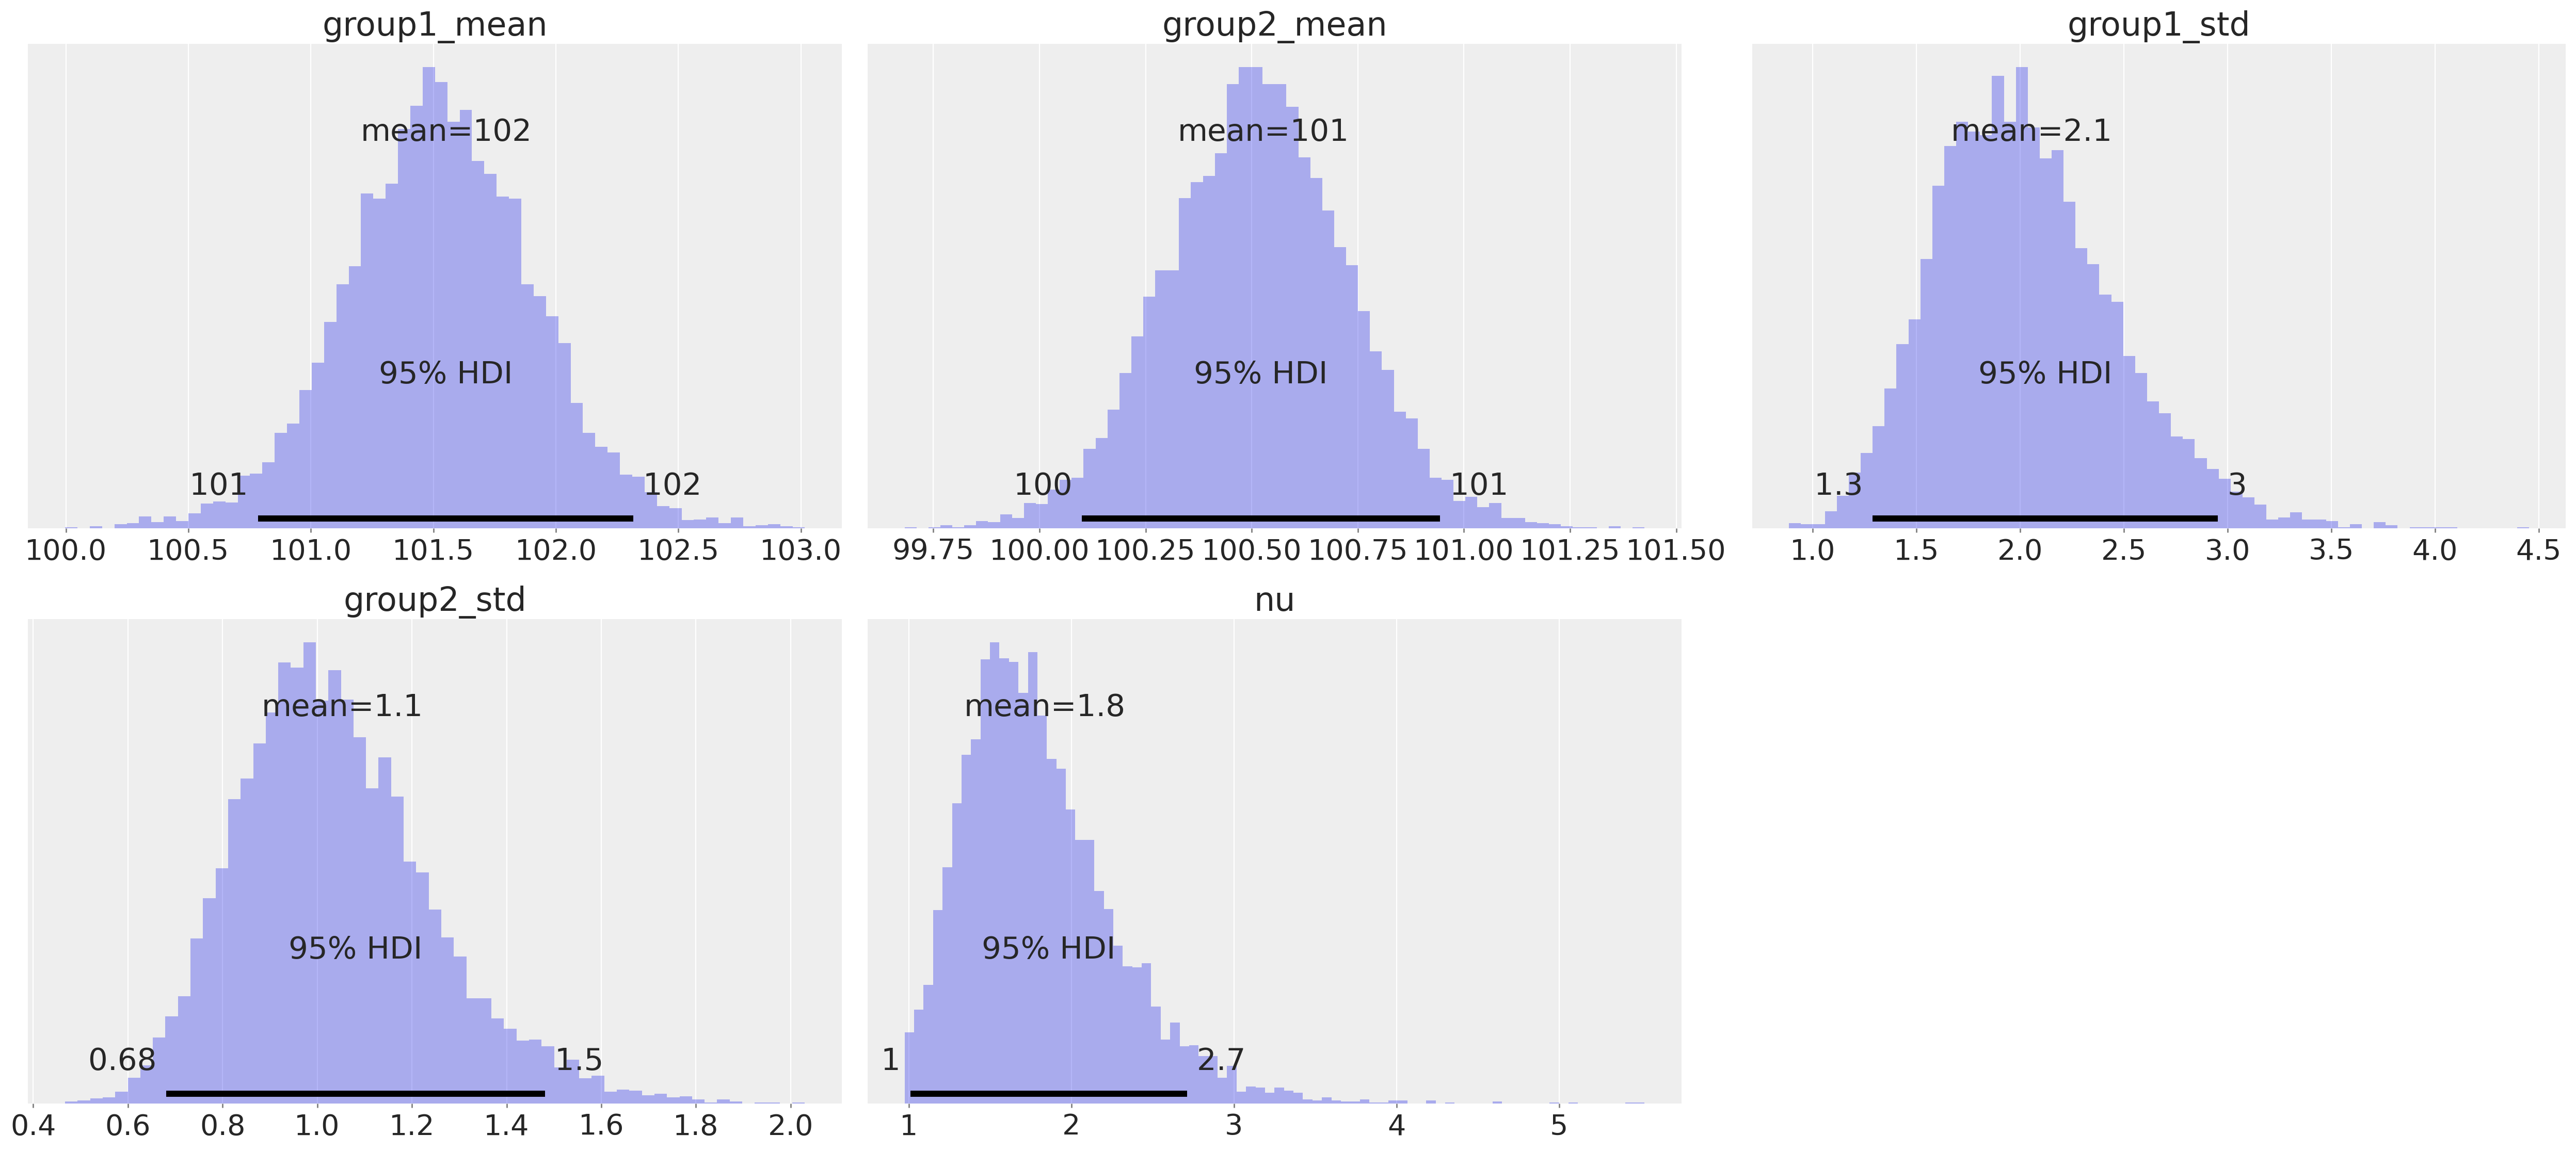

In [9]:
# Plot posterior
az.plot_posterior(
    idata,
    var_names=["group1_mean", "group2_mean", "group1_std", "group2_std", "nu"],
    kind="hist",
    textsize=20
);

In [ ]:
# idata_posterior = idata.posterior


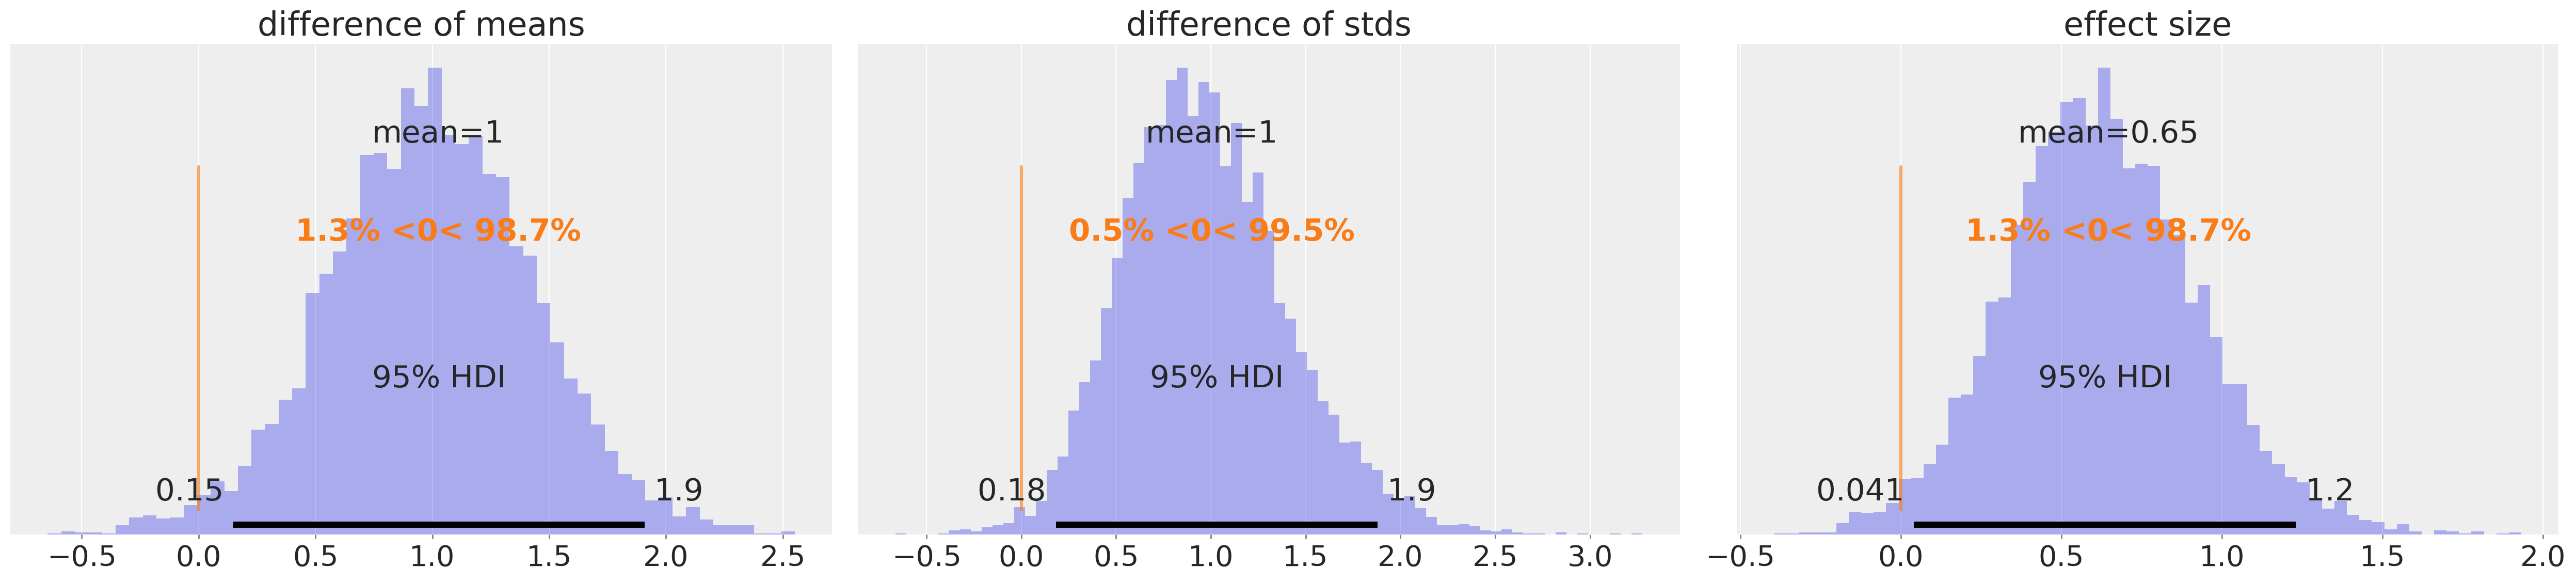

In [10]:
# Plot posterior
az.plot_posterior(
    idata,
    var_names=["difference of means", "difference of stds", "effect size"],
    ref_val=0,
    kind="hist",
    textsize=20
);

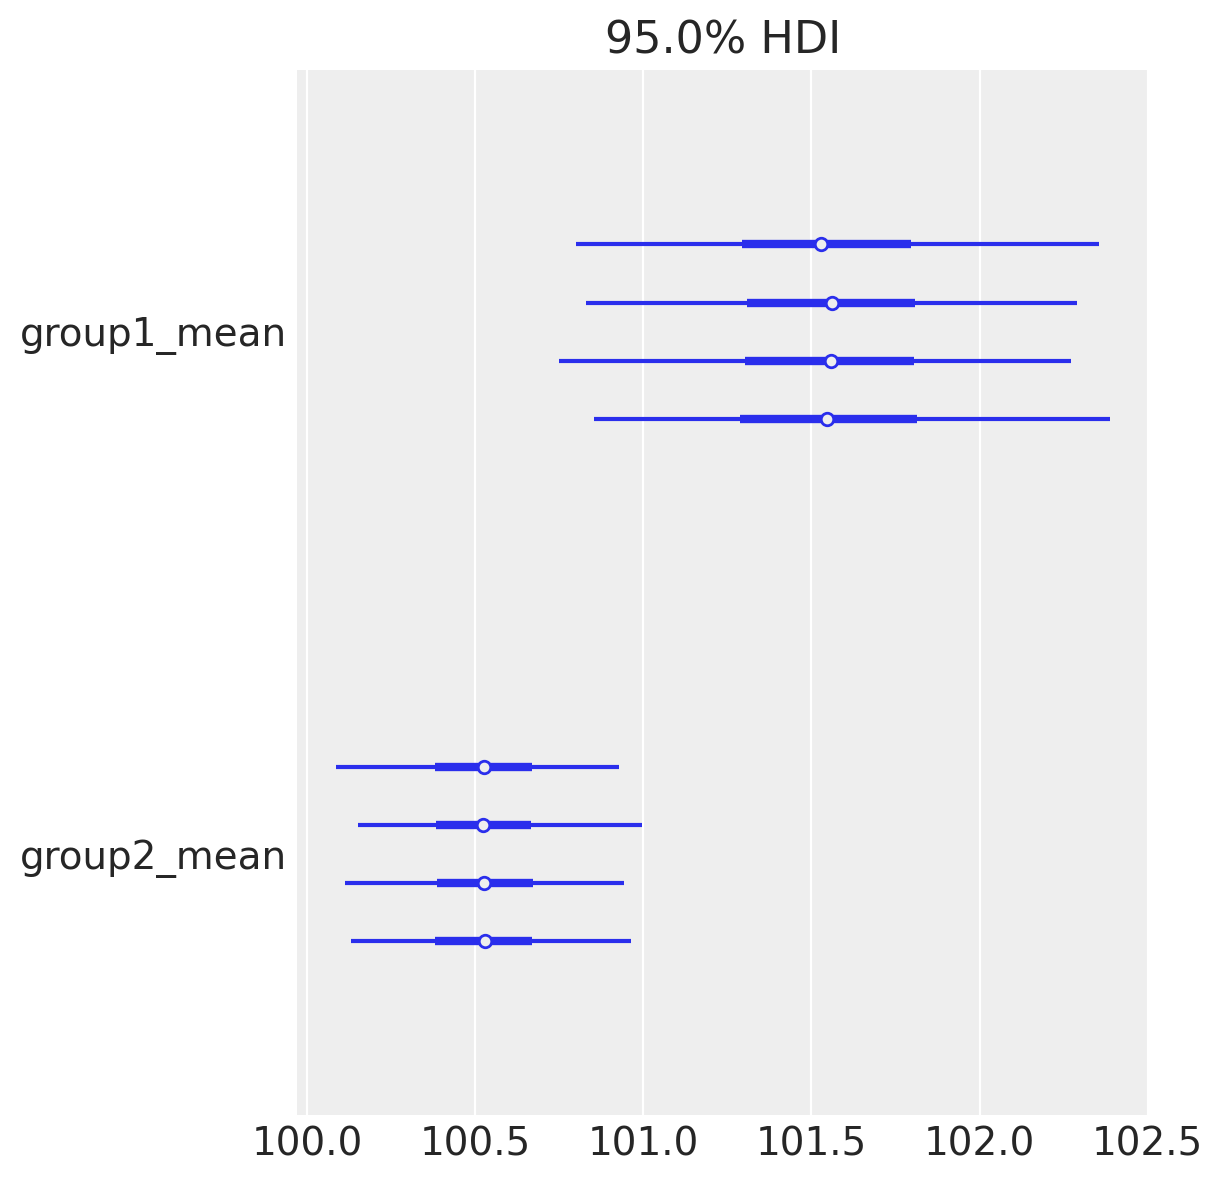

In [11]:
# Plot parameter estimates
az.plot_forest(idata, var_names=["group1_mean", "group2_mean"]);

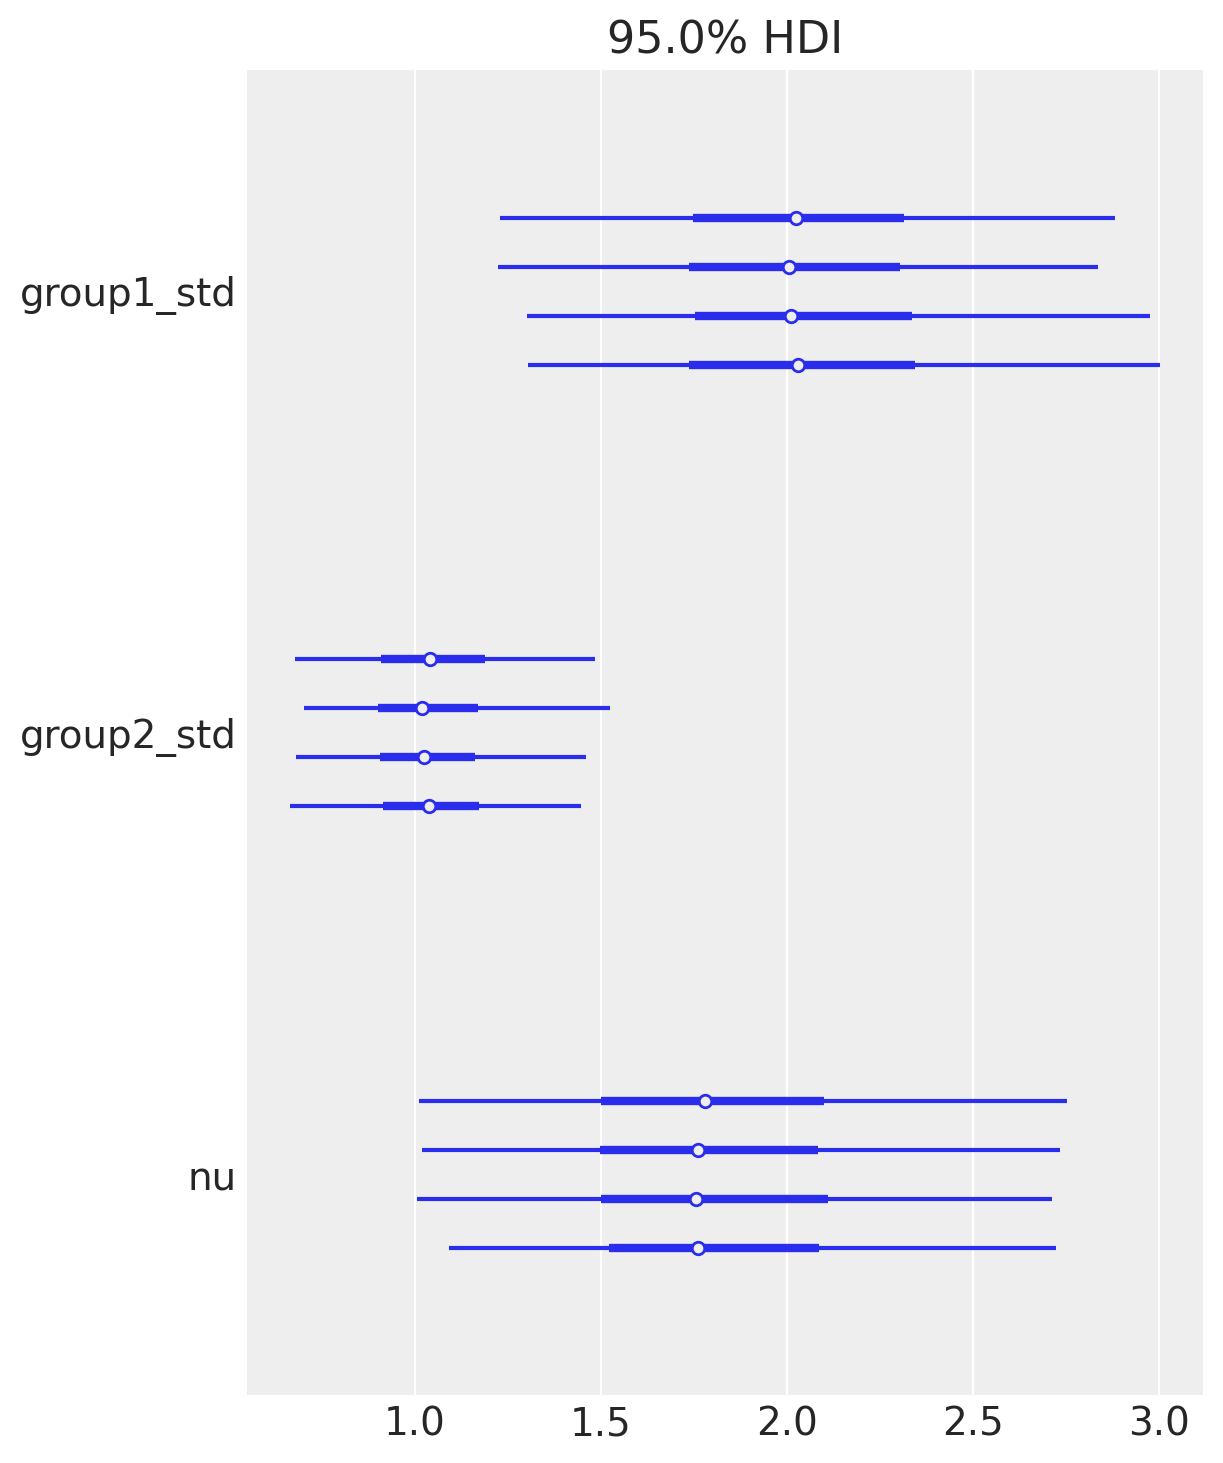

In [12]:
# Plot parameter estimates
az.plot_forest(idata, var_names=["group1_std", "group2_std", "nu"]);

In [ ]:
# If you want to print the model so that you edit, simply add two question marks after the function name.
bst.compare_two_groups??

In [ ]:
# Assess your MCMC chains.
az.plot_trace(idata);